# Predicting Heart Disease in Patients Using A KNN Classification Model 

### Introduction:
Heart disease is the leading cause of death worldwide, accounting for millions of deaths every year. Early diagnosis and treatment of heart disease is crucial to improve patients' outcomes and quality of life. K-Nearest Neighbour (K-NN) Classification can help healthcare professionals more accurately and promptly diagnose heart disease. The question we aimed to answer using our K-NN classification model is whether a patient has heart disease using the patient’s cholesterol levels, age, maximum heart rate they can achieve, and resting blood pressure. 

To answer this question, we used the Heart Disease dataset from the UCI Machine Learning Repository, which contains 303 instances and 14 attributes. We selected these predictor variables based on their known associations with heart diseases. According to our research articles, these four attributes have the strongest association with developing heart disease. Other potential predictor variables, such as exercise induced angina and slope of the peak exercise ST segment, were omitted due to their weaker association with heart disease.

### Methods & Results
We will be utilizing K-NN classification to predict heart disease using the predictors: resting blood pressure (trestbps), age (age), cholesterol levels (chol) and maximum heart rate achieved (thalach). 

We have provided a detailed description describing our chosen predictors: 
    
    1.trestbps: resting blood pressure in mmHg on admission to the hospital 
    2.age: age of patient in years
    3.chol:  serum cholesterol in mg/dl 
    4.thalach: maximum heart rate achieved in bpm

We chose these predictors because they are all strongly linked to heart disease. For example, older patients, specifically age 65+, are more likely to suffer from heart disease than younger patients due to a decrease in heart function and an increase in the stiffness of arteries with increasing age(reference 1). A higher resting blood pressure also increases the risk of heart disease as it adds to a patient's heart’s workload, making the heart less efficient (reference 2,3). Higher cholesterol levels also increase the patient’s risk for heart disease as it creates fatty deposits in their blood vessels that can eventually form a clot(reference 2,4). Lastly, the rate at which a patient's heart beats when it is working its hardest to meet their body's oxygen needs is their maximum heart rate. A higher maximum heart rate is associated with a lower risk of heart disease(reference 5). Given that all these predictors are strongly associated with the risk of heart disease, they are highly appropriate for integration into our classification model.  

We will perform the following steps to perform the preliminary exploratory data analysis:


In [1]:
library(tidyverse)
library(repr)
library(tidymodels)

options(repr.matrix.max.rows = 6)
install.packages("GGally")
install.packages("kknn")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

 1. Load data from Heart Disease dataset: We loaded the Heart Disease dataset from the UCI Machine Learning Repository using R in Jupyter notebook.
 
 2. Data wrangling and cleaning into tidy format: We will clean and wrangle the data to remove missing values, pre-process the data by scaling and converting data to correct data type. 

In [2]:
name <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")

heartdata <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data",col_names = name) |>
    select(age, trestbps, chol, thalach,num)

heartdata

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,trestbps,chol,thalach,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
63,145,233,150,0
67,160,286,108,2
67,120,229,129,1
⋮,⋮,⋮,⋮,⋮
57,130,131,115,3
57,130,236,174,1
38,138,175,173,0


Table 1: Heart Dataset

3. Summarize Data into Table: We will make a table with columns only of the predictor values we chose as well as the “num” column that shows the diagnosis of the patient from integer values of 0-4. We then will use the “mutate” function with the “ifelse” argument to add another column that uses the values from the “num” column to tell us “no” if a patient does not have heart disease (num = 0), and “yes” if a patient has heart disease (num = 1- 4). We will then make a summary table using the training data to tell us the count of how many people in the dataset are diagnosed with heart disease.

In [3]:
heartdata <- heartdata |>
    mutate(heart_disease = ifelse(num > 0, "yes", "no")) 


heartdata

age,trestbps,chol,thalach,num,heart_disease
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
63,145,233,150,0,no
67,160,286,108,2,yes
67,120,229,129,1,yes
⋮,⋮,⋮,⋮,⋮,⋮
57,130,131,115,3,yes
57,130,236,174,1,yes
38,138,175,173,0,no


Table 2: Heart Dataset with mutated column of heart_disease

4. Split the data into training and testing sets: We will use the training data set to create a summary table and visualizations listed below.

In [4]:
set.seed(2023)
heart_split <- initial_split(heartdata, prop = 0.75, strata = heart_disease)  
heart_train <- training(heart_split)   
heart_test <- testing(heart_split)

 5. Visualize Data: We will create 3 scatter plots with age for the y-axis for all, and cholesterol levels, maximum heart rate achieved, and resting blood pressure for the x-axis, respectively. We will color the points according to the diagnosis of heart disease (yes or no).

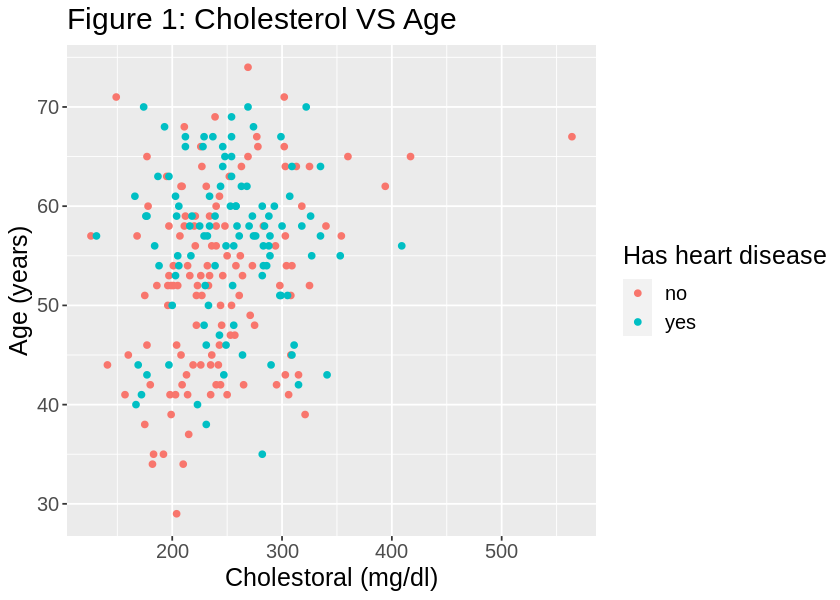

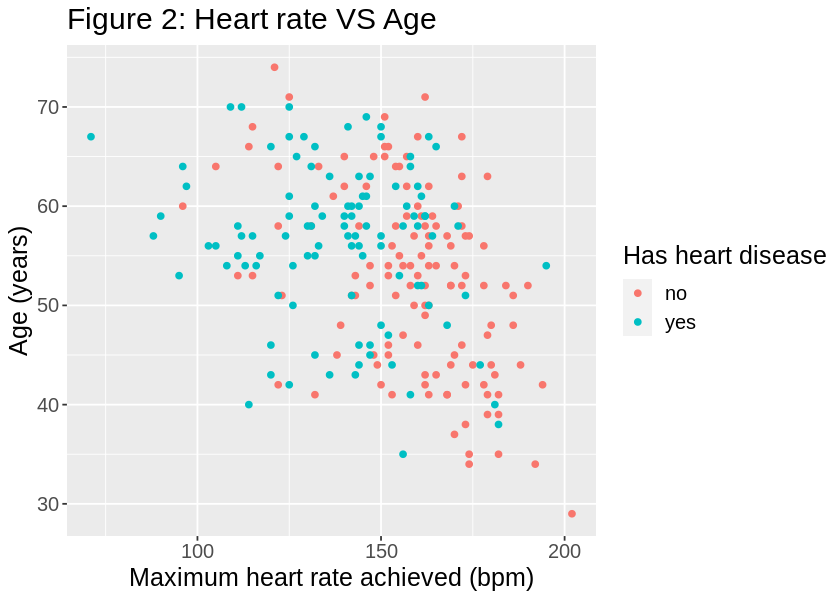

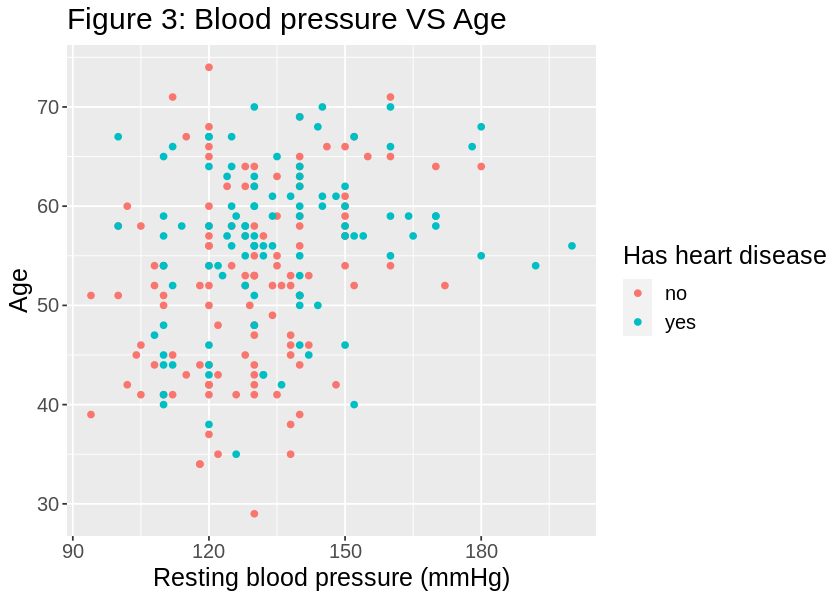

In [5]:
options(repr.plot.width = 7, repr.plot.height = 5)

p1 <- heart_train |>  
    ggplot(aes(x= chol, 
               y= age, 
               color = heart_disease)) +
        labs(x = "Cholestoral (mg/dl)",
             y = "Age (years)",
            colour = 'Has heart disease') +
        geom_point(stat = "identity") +
        theme(text = element_text(size = 15)) +
        ggtitle("Figure 1: Cholesterol VS Age")

p2 <- heart_train |>  
    ggplot(aes(x= thalach, 
               y= age, 
               color = heart_disease)) +
        labs(x = "Maximum heart rate achieved (bpm)",
             y = "Age (years)",
            colour = 'Has heart disease') +
        geom_point(stat = "identity") +
        theme(text = element_text(size = 15)) +
        ggtitle("Figure 2: Heart rate VS Age")


p3 <- heart_train |>  
    ggplot(aes(x= trestbps, 
               y= age, 
               color = heart_disease)) +
        labs(x = "Resting blood pressure (mmHg)",
             y = "Age",
            colour = 'Has heart disease') +
        geom_point(stat = "identity") +
        theme(text = element_text(size = 15)) +
        ggtitle("Figure 3: Blood pressure VS Age")

layout(matrix(3:1, nrow = 1))

p1
p2
p3

6. Create a summary table: We will create a summary table to summarize how many patients in the data set have and don’t have heart disease. We also found the mean values of the predictors: chol, trestbps, and thalach. Summarize the number of people has or does not have heart disease and mean value of 'Cholesterol', 'Maximum heart rate' and 'Resting blood pressure' :

In [6]:
counts <- heart_train |>
group_by(heart_disease) |>
summarize (count = n())

mean <- 
colMeans(heart_train[ , c(2: 4)])

counts
mean

heart_disease,count
<chr>,<int>
no,123
yes,104


trestbps     chol  thalach 
131.9868 247.2907 149.4229

Table 3: Summary Table for the number of people with and without heart disease

We will perform the following steps to train, evaluate, and tune the model:
    
  1. Preprocess data to standardize predictors: Using the recipe framework from tidymodels, we scaled and centered our chosen predictors, and constructed a recipe using only the training dataset. This step ensures that our test data does not influence any aspect of our model training. Scaling and centering the predictors also ensures that each predictor contributes equally to the model, which is important to improve the model's performance and accuracy. 

In [7]:
heart_recipe <- recipe(heart_disease ~ age + chol + thalach + trestbps, data = heart_train) |>
   step_scale(all_predictors()) |>
   step_center(all_predictors())

 2. Model specification: We created a model specification for K-nearest neighbors classification to find the optimal K. By finding the optimal K, we can improve the accuracy of the model and ensure its effectiveness.

In [8]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
      set_engine("kknn") |>
      set_mode("classification")


 3. Perform cross validation: We then ran a 5-fold cross-validation for a grid of numbers of neighbors ranging from 1 to 70, and put the recipe and specification together in a workflow. Cross validation allows us to visualize the relationship between the number of neighbors and the accuracy of the model, which can help us to identify the optimal number of neighbors for the model. 

In [9]:
heart_vfold <- vfold_cv(heart_train, v = 5, strata = heart_disease)
k_vals <-tibble(neighbors =seq(from =1, to =70, by =5))

In [10]:
heart_fit <- workflow() |>
      add_recipe(heart_recipe) |>
      add_model(knn_spec) |>
      tune_grid(resamples = heart_vfold, grid = k_vals)

In [11]:
knn_results <- heart_fit |>  
    collect_metrics() |>
    filter(.metric == "accuracy")

knn_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.5775231,5,0.04000165,Preprocessor1_Model01
6,accuracy,binary,0.6171366,5,0.02205367,Preprocessor1_Model02
11,accuracy,binary,0.6840184,5,0.03493477,Preprocessor1_Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
56,accuracy,binary,0.6740404,5,0.01968118,Preprocessor1_Model12
61,accuracy,binary,0.6741414,5,0.01656049,Preprocessor1_Model13
66,accuracy,binary,0.6876768,5,0.02059398,Preprocessor1_Model14


Table 4: Accuracy for Different K

4. Visualize the accuracy for a range of K values: We will create a line graph by plotting accuracy versus K to help us visualize which number of neighbors is the best. We will then take the maximum accuracy for a particular value of K to find the best number of neighbors. 

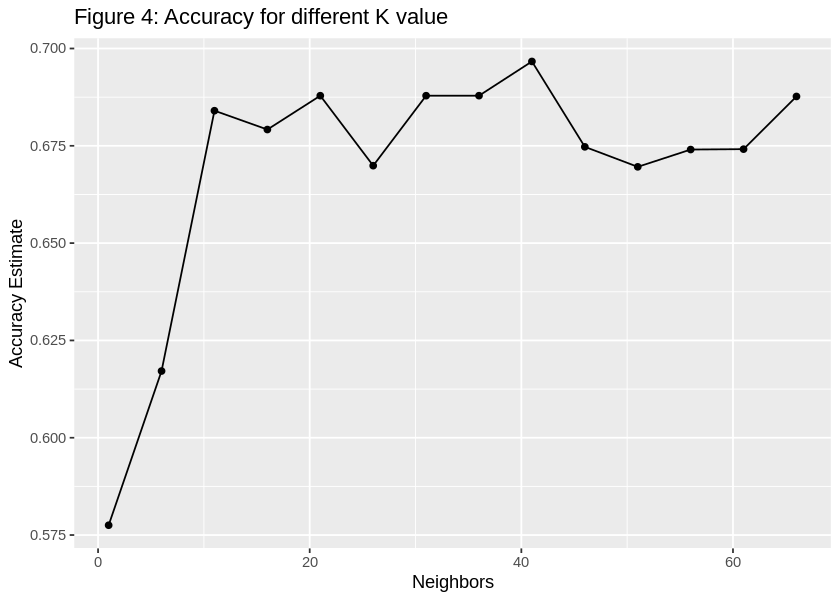

In [12]:
accuracy_versus_k <- ggplot(knn_results, aes(x = neighbors, y = mean))+
      geom_point() +
      geom_line() +
      labs(x = "Neighbors", y = "Accuracy Estimate")  +
        ggtitle("Figure 4: Accuracy for different K value")

accuracy_versus_k

Best K value:

In [13]:
best_k <- knn_results |>
    filter(mean == max(mean)) |>
    pull(neighbors)

best_k

[1] 41

5. Re-training the model with the best K: Once we know the value for K that yields  the highest accuracy estimate, we will use that to re-train the model on the entire training data set.

In [14]:
best_k_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |>
      set_engine("kknn") |>
      set_mode("classification")

best_k_fit <- workflow() |>
  add_recipe(heart_recipe) |>
  add_model(best_k_spec) |>
  fit(data = heart_train)

  6. Evaluate model using test data: To assess how well our model might do at predicting on unseen data, we will assess its accuracy on the test data. We will use the “predict” function to make predictions on the test data, and use the “metrics” function again to compute the summary of the model’s accuracy. Determining the accuracy of the model is important to assess the model's ability to generalize to new data and its overall effectiveness in making accurate predictions.

In [15]:
predictions <- predict(best_k_fit , heart_test) |>
       bind_cols(heart_test) |>
        mutate(heart_disease = as_factor(heart_disease))

metrics <- predictions |>
        metrics(truth = heart_disease, estimate = .pred_class) |>
        filter(.metric == "accuracy") |>
        pull(.estimate)

conf_mat <- predictions |> 
      conf_mat(truth = heart_disease, estimate = .pred_class)

predictions
metrics
conf_mat

.pred_class,age,trestbps,chol,thalach,num,heart_disease
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
yes,63,145,233,150,0,no
yes,67,160,286,108,2,yes
no,37,130,250,187,0,no
⋮,⋮,⋮,⋮,⋮,⋮,⋮
no,55,132,342,166,0,no
yes,57,140,241,123,1,yes
no,57,130,236,174,1,yes


[1] 0.6315789

          Truth
Prediction no yes
       no  29  16
       yes 12  19

Table 5: Predictions, Accuracy and Truth Value.

### Discussion
The K-NN classification model applied to the Heart Disease dataset yielded an accuracy of 63%, indicating that it could correctly identify patients with heart disease 63% of the time.
This suggested that the selected predictor variables, including age, cholesterol levels, maximum heart rate, and resting blood pressure, were not as effective in predicting the presence of heart disease as initially believed. This was surprising, as these predictors are well-established risk factors for heart disease, and one would expect them to yield a model with higher accuracy. A possible reason for the lower accuracy of our final K-NN classification model could be due to the small size of the Heart Disease dataset. With only 303 patients in the dataset, there may not have been enough patients to effectively train our model. Additionally, a small dataset can increase the risk of overfitting, as the model can become too specific to our training data and not generalize well to new data, like the test data. However, despite this limitation, the model achieved moderate success in accurately identifying the presence or absence of heart disease in 48 out of 76 total observations.

This level of accuracy suggests that the model could potentially be a helpful tool for healthcare professionals for heart disease diagnosis. However, due to the accuracy not being high enough for a medical tool, it should be noted that this K-NN classification model can not be the sole method for diagnosing heart disease. This could result in misdiagnosis which could harm patients' health and wellbeing.

Despite its current limitations, our K-NN classification model has the potential to make a significant contribution to the medical community by contributing to more effective Heart Disease diagnoses. To achieve this, we can make a few modifications to the model. For example, for the future, we could utilize feature selection techniques to identify and incorporate only the most relevant features for the model, thereby enhancing its accuracy. By doing so, we can provide faster and more accurate diagnoses, leading to earlier treatment and potentially saving lives. If a patient is diagnosed with heart disease, some further questions that it would lead would be what stage of heart disease the patient is at and what treatment plans would be best for them, considering the stage of heart disease they are diagnosed with. 

### References

    1.NIH National Institute on Aging. (2018). Heart health and aging. National Institute on Aging. https://www.nia.nih.gov/health/heart-health-and-aging 
    2.Centers for Disease Control and Prevention. (2023, March 21). Know your risk for heart disease. Centers for Disease Control and Prevention. https://www.cdc.gov/heartdisease/risk_factors.htm#:~:text=About%20half%20of%20all%20Americans,%2C%20high%20cholesterol%2C%20and%20smoking.&text=Some%20risk%20factors%20for%20heart,the%20factors%20you%20can%20control
    3.American Heart Association. (2022, March 4). How high blood pressure can lead to heart failure. American Heart Association. https://www.heart.org/en/health-topics/high-blood-pressure/health-threats-from-high-blood-pressure/how-high-blood-pressure-can-lead-to-heart-failure 
    4.Mayo Clinic. (2023, January 11). High cholesterol. Mayo Clinic. https://www.mayoclinic.org/diseases-conditions/high-blood-cholesterol/symptoms-causes/syc-20350800 
    5.Harvard Health Publishing. (2020, August 30). What your heart rate is telling you. Harvard Health. https://www.health.harvard.edu/heart-health/what-your-heart-rate-is-telling-you
    6.Dua, D. and Graff, C. (2019). UCI Machine Learning Repository. Irvine, CA: University of California, School of Information and Computer Science. http://archive.ics.uci.edu/ml.
